<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 153.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 148.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 125.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 165.4 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




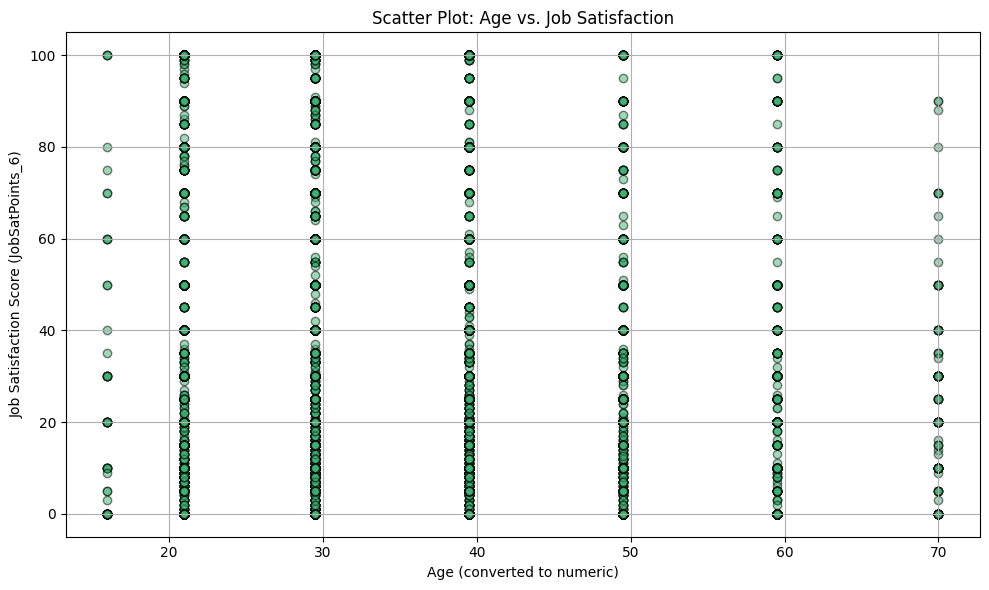

In [3]:
# Age を数値に変換するための辞書
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Age を数値化
df['AgeNumeric'] = df['Age'].map(age_map)

# JobSatPoints_6 を数値に変換
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# 欠損を除去
df_clean = df.dropna(subset=['AgeNumeric', 'JobSatPoints_6'])

# 散布図を描画
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AgeNumeric'], df_clean['JobSatPoints_6'], alpha=0.5, color='mediumseagreen', edgecolors='black')
plt.title('Scatter Plot: Age vs. Job Satisfaction')
plt.xlabel('Age (converted to numeric)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


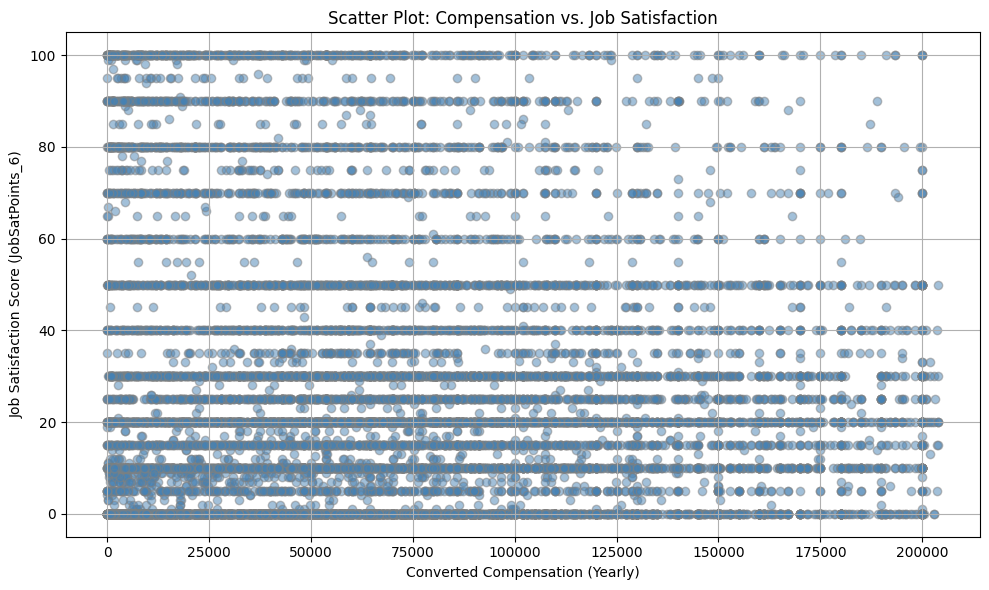

In [4]:
# 数値に変換（文字列などを NaN に）
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# 欠損値を除外
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# 外れ値を除外（年収の上位5%をカット）
df_filtered = df_clean[df_clean['ConvertedCompYearly'] < df_clean['ConvertedCompYearly'].quantile(0.95)]

# 散布図の描画
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['ConvertedCompYearly'], df_filtered['JobSatPoints_6'],
            alpha=0.5, color='steelblue', edgecolors='gray')

plt.title('Scatter Plot: Compensation vs. Job Satisfaction')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


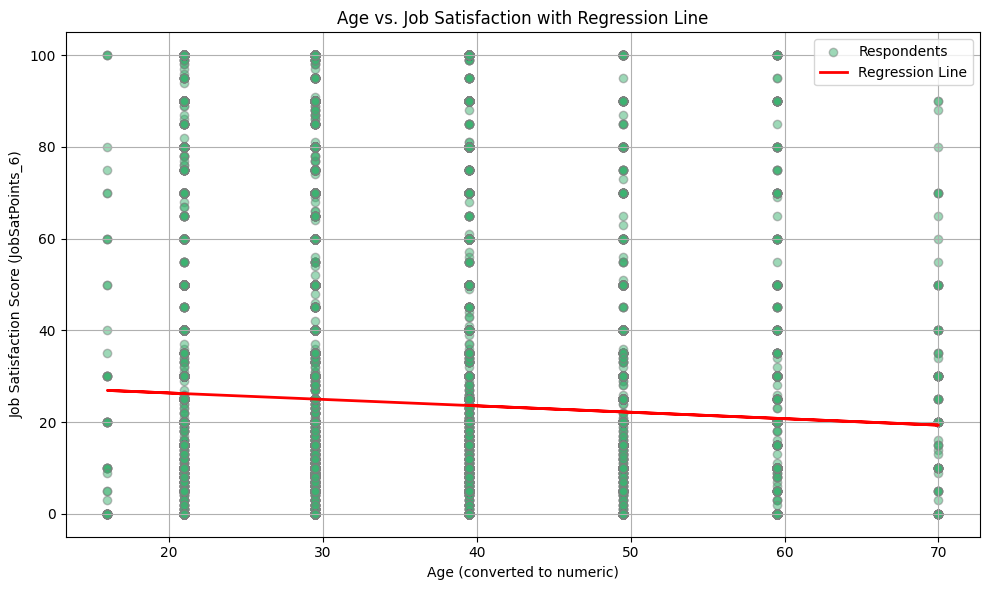

In [5]:
import numpy as np

# Ageカテゴリを数値化する辞書
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# 年齢を数値化
df['AgeNumeric'] = df['Age'].map(age_map)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# 欠損除去
df_clean = df.dropna(subset=['AgeNumeric', 'JobSatPoints_6'])

# 散布図の描画
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AgeNumeric'], df_clean['JobSatPoints_6'], alpha=0.5,
            color='mediumseagreen', edgecolors='gray', label='Respondents')

# 回帰線の追加
x = df_clean['AgeNumeric']
y = df_clean['JobSatPoints_6']
slope, intercept = np.polyfit(x, y, 1)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', linewidth=2, label='Regression Line')

# グラフ装飾
plt.title('Age vs. Job Satisfaction with Regression Line')
plt.xlabel('Age (converted to numeric)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


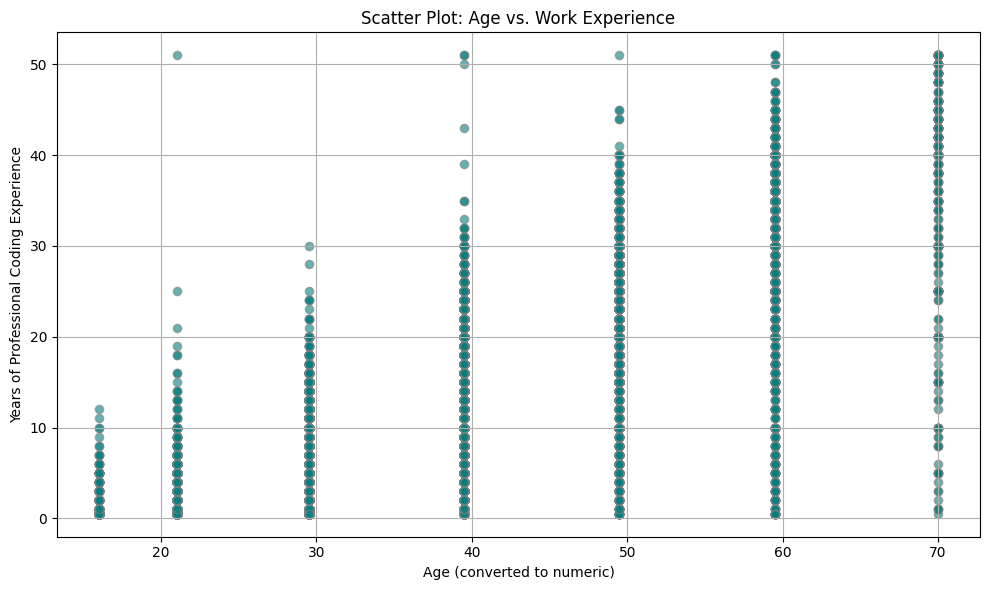

In [6]:
# 年齢カテゴリを中央値に変換
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_map)

# 経験年数を数値に変換
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 欠損を除外
df_clean = df.dropna(subset=['AgeNumeric', 'YearsCodePro'])

# 散布図の描画
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AgeNumeric'], df_clean['YearsCodePro'], alpha=0.6,
            color='teal', edgecolors='gray')

plt.title('Scatter Plot: Age vs. Work Experience')
plt.xlabel('Age (converted to numeric)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


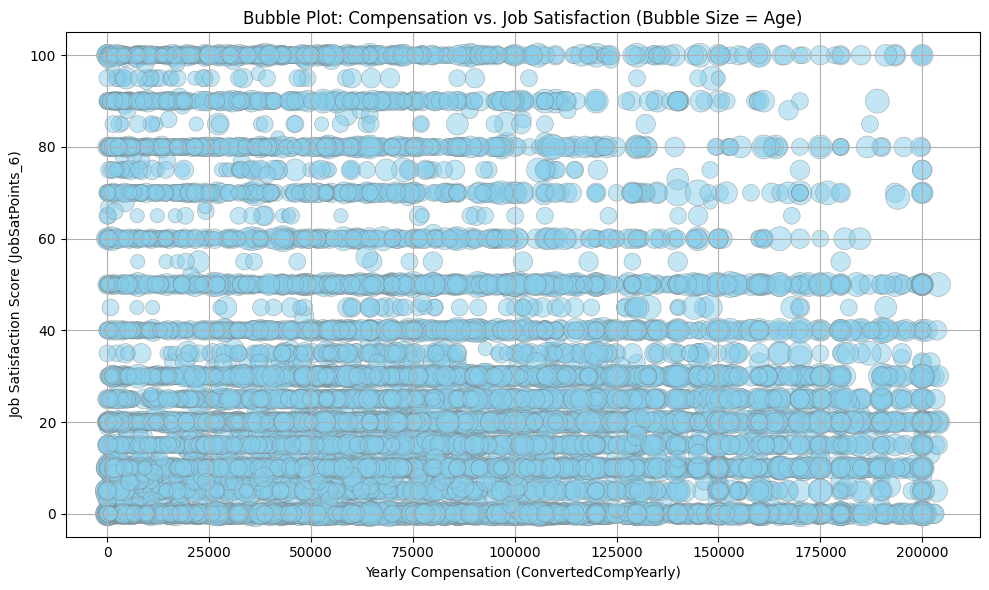

In [7]:
# Age を数値に変換
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['AgeNumeric'] = df['Age'].map(age_map)

# 数値変換
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# 欠損除外
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'AgeNumeric'])

# 外れ値除外（年収の上位5%をカット）
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.95)]

# バブルサイズを適度に調整（視覚的に見やすく）
df['BubbleSize'] = df['AgeNumeric'] * 5

# バブルプロット描画
plt.figure(figsize=(10, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'],
            s=df['BubbleSize'], alpha=0.5, color='skyblue', edgecolors='gray', linewidth=0.5)

plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


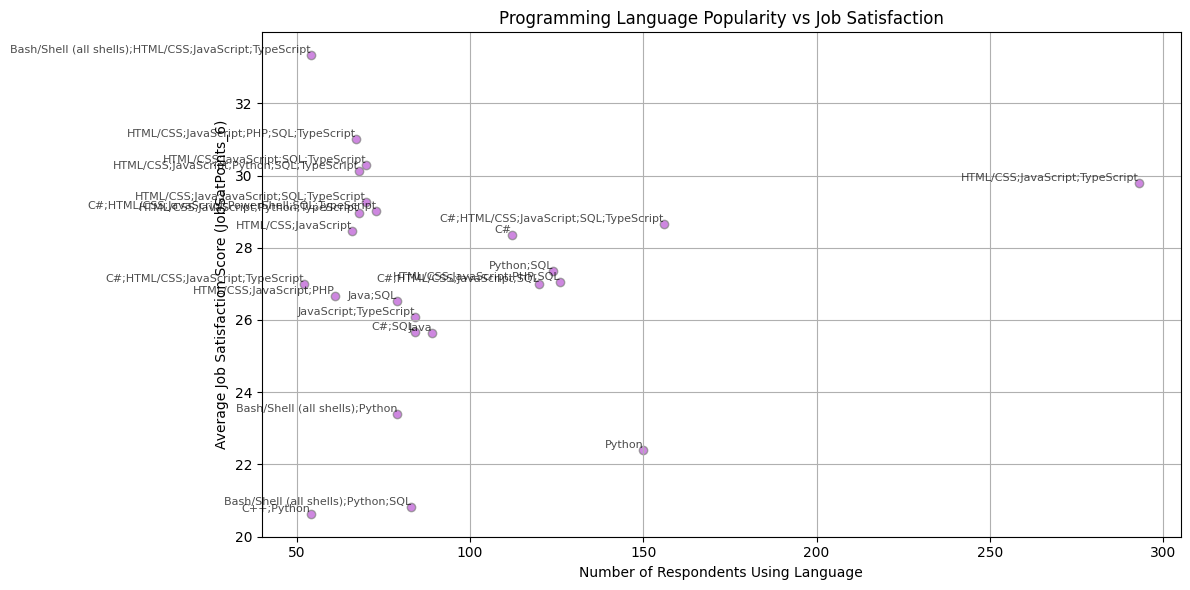

In [8]:
# 欠損除去・分割処理
df = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['JobSatPoints_6'])

# 言語リストを分割・展開（explode）
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(',')
df = df.explode('Languages')
df['Languages'] = df['Languages'].str.strip()

# 各言語ごとに平均満足度と登場数を集計
lang_group = df.groupby('Languages').agg(
    AvgSatisfaction=('JobSatPoints_6', 'mean'),
    Count=('Languages', 'count')
).reset_index()

# 閾値：一定数以上の使用者がいる言語だけに絞る（視認性のため）
lang_group = lang_group[lang_group['Count'] > 50]

# 散布図の描画
plt.figure(figsize=(12, 6))
plt.scatter(lang_group['Count'], lang_group['AvgSatisfaction'],
            alpha=0.7, color='mediumorchid', edgecolors='gray')

# 言語ラベルを表示（任意）
for i, row in lang_group.iterrows():
    plt.text(row['Count'], row['AvgSatisfaction'], row['Languages'],
             fontsize=8, ha='right', va='bottom', alpha=0.7)

# グラフ装飾
plt.title('Programming Language Popularity vs Job Satisfaction')
plt.xlabel('Number of Respondents Using Language')
plt.ylabel('Average Job Satisfaction Score (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


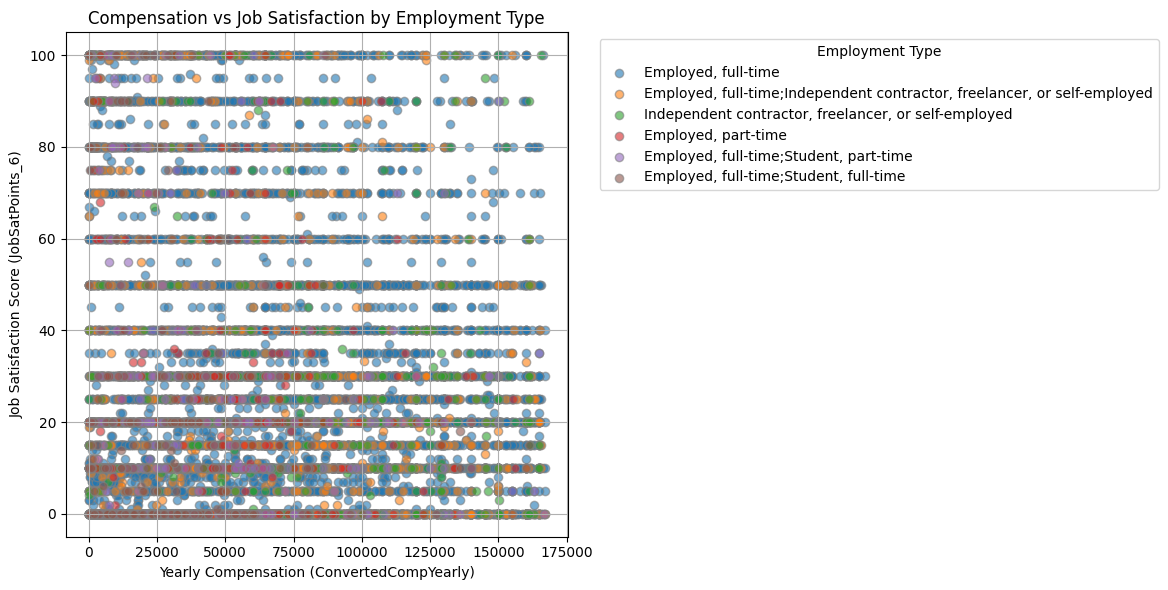

In [9]:
# 数値変換・欠損除去
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# 外れ値（年収の上位5%）を除去
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.95)]

# Employment ごとにグループ化して色分け
unique_employment = df['Employment'].value_counts().head(6).index.tolist()  # 上位6種類だけ表示（多すぎると見づらい）

# 描画設定
plt.figure(figsize=(12, 6))

for emp_type in unique_employment:
    sub_df = df[df['Employment'] == emp_type]
    plt.scatter(sub_df['ConvertedCompYearly'], sub_df['JobSatPoints_6'],
                label=emp_type, alpha=0.6, edgecolors='gray')

# グラフ装飾
plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


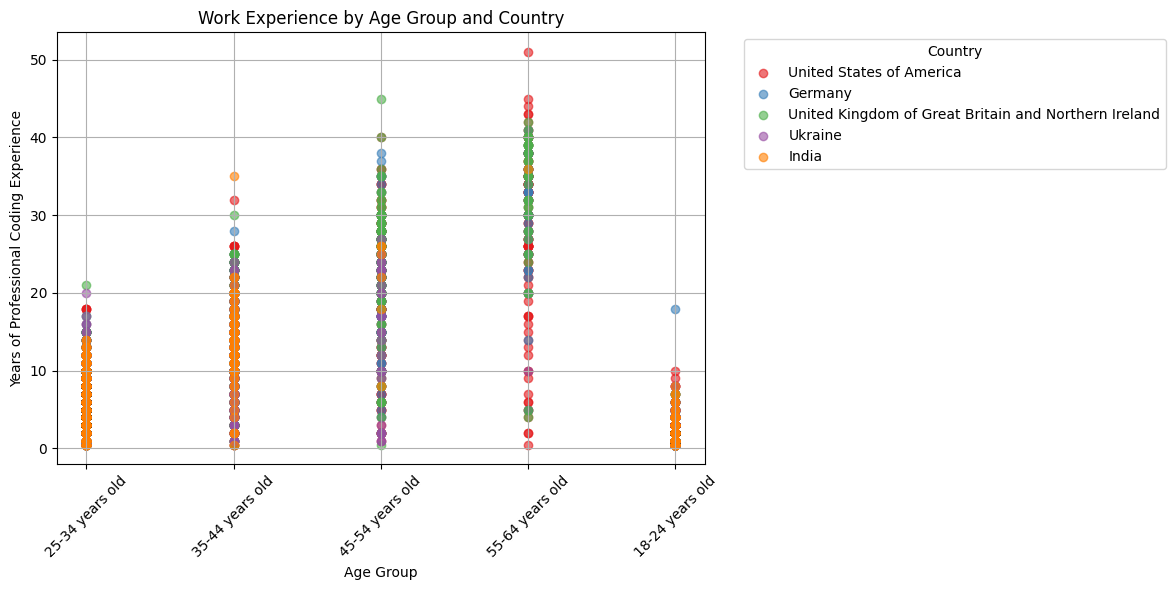

In [11]:
# YearsCodePro を数値に変換
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 欠損除去
df = df.dropna(subset=['Age', 'YearsCodePro', 'Country'])

# 上位の国と年齢層に絞る（見やすくするため）
top_countries = df['Country'].value_counts().head(5).index.tolist()
top_ages = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df = df[df['Country'].isin(top_countries) & df['Age'].isin(top_ages)]

# Age カテゴリの順序を設定
df['Age'] = pd.Categorical(df['Age'], categories=top_ages, ordered=True)

# 描画準備
plt.figure(figsize=(12, 6))
colors = plt.cm.Set1.colors
country_colors = {country: colors[i % len(colors)] for i, country in enumerate(top_countries)}

# 国ごとにプロット
for country in top_countries:
    subset = df[df['Country'] == country]
    plt.scatter(subset['Age'], subset['YearsCodePro'],
                alpha=0.6, color=country_colors[country], label=country)

# グラフ装飾
plt.title('Work Experience by Age Group and Country')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
